In [1]:
from sde import * 
import collections
import datetime
import time

In [2]:
%load_ext jupyternotify

<IPython.core.display.Javascript object>

In [3]:
%%notify
import time
time.sleep(10)
print('Finished!')

%autonotify -a 30

Finished!


<IPython.core.display.Javascript object>

1. randomly generate x graphs, get average node centrality
2. compare similarity against average centrality

# Experiment Setup

In [ ]:
dg = nx.gn_graph(100)
for e in dg.edges():
    dg[e[0]][e[1]]['weight'] = random.uniform(0,1)

nx.draw_networkx(dg)

In [ ]:
node_pairs = list(it.combinations(list(dg.nodes()), 2))
sample_10_jaccard = []
for pair in node_pairs:
    sample_10_jaccard.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
print(sample_10_jaccard)

In [ ]:
sample_10_immSim, sample_10_fullSim = [], []
for pair in node_pairs:
    sample_10_immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
    sample_10_fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
print(sample_10_immSim, sample_10_fullSim)

In [ ]:
def highestCentrality(dg):
    centDict = nx.degree_centrality(dg)
    centList = list(centDict.values())
    highestCent = max(centList)
    return highestCent

In [ ]:
highestCentrality(dg)

In [ ]:
dict(dg.degree(list(dg.nodes())))

In [ ]:
deg_dict = dict(dg.degree(list(dg.nodes())))
highest_degree = max(list(deg_dict.values()))
print(deg_dict)
print(highest_degree)

In [ ]:
jindex, immSim, fullSim = [], [], []
dictsJI, dictsIS, dictsFS = [], [], []
for pair in node_pairs:
    jindex.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
    immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
    fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
                
dictsJI.append({highest_degree : jindex})
dictsIS.append({highest_degree : immSim})
dictsFS.append({highest_degree : fullSim})

print(dictsJI, dictsIS, dictsFS)

In [ ]:
df = pd.DataFrame(dictsJI)
df

# Experiment

In [4]:
from collections import defaultdict

d1 = {1: 2, 3: 4}
d2 = {1: 6, 3: 7}

dd = defaultdict(list)

for d in (d1, d2): # you can list as many input dicts as you want here
    for key, value in d.items():
        dd[key].append(value)

print(dict(dd))

{1: [2, 6], 3: [4, 7]}


In [5]:
import time
start = time.time()
print(dict(dd))
end = time.time()
print(end-start)

{1: [2, 6], 3: [4, 7]}
0.000997304916381836


In [6]:
# source: https://www.geeksforgeeks.org/python-program-to-convert-seconds-into-hours-minutes-and-seconds/
def convert(seconds): 
    return time.strftime("%H:%M:%S", time.gmtime(n)) 

In [7]:
node_num = [50, 100, 500, 1000]
maxCent, avgMax = {}, {}
jaccards, imm_sims, full_sims = {}, {}, {}
avgSecECT = {}

for n in node_num:
    highest_degs = []
    dictsJI, dictsIS, dictsFS = [], [], []
    elapsed_time = []
    for i in range(15):
        starttime = time.time() #mark start time
        
        #create digraph, add edge weights
        dg = nx.gn_graph(n)
        for e in dg.edges():
            dg[e[0]][e[1]]['weight'] = random.uniform(0,1)
        
        #high_cent = highestCentrality(dg)
        #highest_cents.append(high_cent)
        deg_dict = dict(dg.degree(list(dg.nodes())))
        highest_degree = max(list(deg_dict.values()))
        highest_degs.append(highest_degree)

        #get similarity
        node_pairs = list(it.combinations(list(dg.nodes), 2)) #get all possible pairs of nodes in the graph
        jindex, immSim, fullSim = [], [], []
        for pair in node_pairs:
            jindex.append(calculate_jaccard_similarity(dg, pair[0], pair[1]))
            immSim.append(get_immediate_similarity(dg, pair[0], pair[1]))
            fullSim.append(get_full_similarity(dg, pair[0], pair[1]))
                
        dictsJI.append({highest_degree : jindex})
        dictsIS.append({highest_degree : immSim})
        dictsFS.append({highest_degree : fullSim})
        
        endtime = time.time() #mark end time
        elapsed_time.append(endtime-starttime) #calculate elapsed time
        
    
    ddJI, ddIS, ddFS = defaultdict(list), defaultdict(list), defaultdict(list)
    #merge similarity dictionaries based on key (highest degree value)
    for d in tuple(dictsJI): #Jaccard dicts
        for key, value in d.items():
            ddJI[key] = value
    for d in tuple(dictsIS): # imm sim dicts
        for key, value in d.items():
            ddIS[key] = value
    for d in tuple(dictsFS): #full sim dicts
        for key, value in d.items():
            ddFS[key] = value
    
    #record run time
    avgECT_seconds = mean(elapsed_time)
    avgSecECT[n] = convert(avgECT_seconds) 

<IPython.core.display.Javascript object>

([<matplotlib.axis.XTick at 0x154ec324fc8>,
 <a list of 12 Text xticklabel objects>)

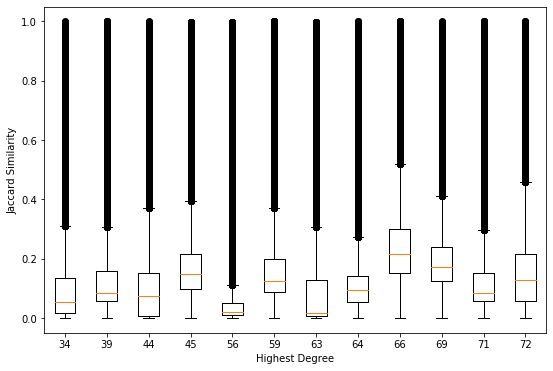

In [8]:
# box plot to compare jaccard similarity against average node centrality
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

jaccards = collections.OrderedDict(sorted(ddJI.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(jaccards.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Jaccard Similarity')
plt.xticks([x for x in range(1, len(list(jaccards.keys())) + 1)], list(jaccards.keys()))

([<matplotlib.axis.XTick at 0x15485245ec8>,
 <a list of 12 Text xticklabel objects>)

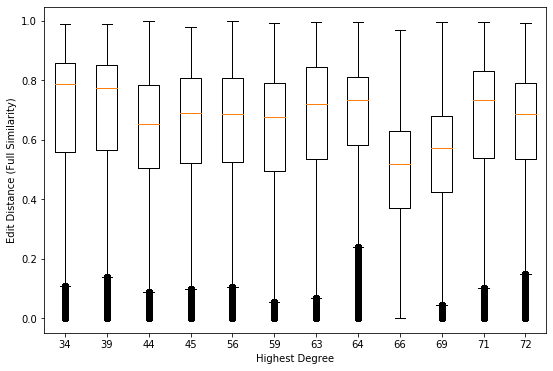

In [9]:
# box plot to compare full sim vals against average node centrality
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

full_sims = collections.OrderedDict(sorted(ddFS.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(full_sims.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Edit Distance (Full Similarity)')
plt.xticks([x for x in range(1, len(list(full_sims.keys())) + 1)], list(full_sims.keys()))

([<matplotlib.axis.XTick at 0x154e5a23508>,
 <a list of 12 Text xticklabel objects>)

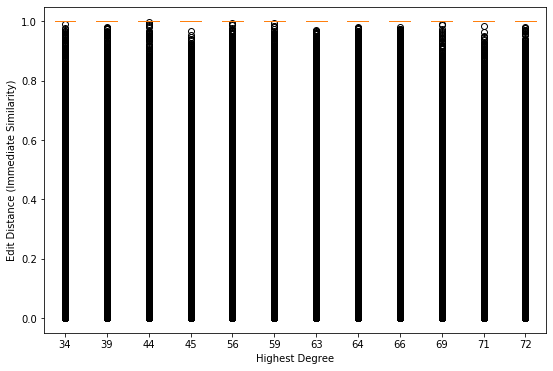

In [10]:
# box plot to compare imm sim vals against average node degree
plt.close()
fig2 = plt.figure(1, figsize=(9, 6))

imm_sims = collections.OrderedDict(sorted(ddIS.items()))
ax2 = fig2.add_subplot(111)
ax2.boxplot(list(imm_sims.values()))

ax2.set_xlabel('Highest Degree')
ax2.set_ylabel('Edit Distance (Immediate Similarity)')
plt.xticks([x for x in range(1, len(list(imm_sims.keys())) + 1)], list(imm_sims.keys()))

In [11]:
dfECT = pd.DataFrame.from_dict(avgSecECT,orient = 'index', columns=['Avg Runtime'])
dfECT.index.name = '# of nodes'
dfECT

,Avg Runtime
# of nodes,
50,00:00:50
100,00:01:40
500,00:08:20
1000,00:16:40
